In [1]:
!pip install gdown

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [3]:
!gdown 'https://drive.google.com/uc?id=1u6qZnqsgTOuXK1pT7xxO6V5ibBPAuZKP'

Downloading...
From: https://drive.google.com/uc?id=1u6qZnqsgTOuXK1pT7xxO6V5ibBPAuZKP
To: /content/250k Medicines Usage, Side Effects and Substitutes.csv
100% 89.4M/89.4M [00:02<00:00, 32.6MB/s]


In [4]:
data=pd.read_csv('250k Medicines Usage, Side Effects and Substitutes.csv')

<ipython-input-4-2b4d6bb2738f>:1: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('250k Medicines Usage, Side Effects and Substitutes.csv')


In [5]:
print(data.columns)

Index(['id', 'name', 'substitute0', 'substitute1', 'substitute2',
       'substitute3', 'substitute4', 'sideEffect0', 'sideEffect1',
       'sideEffect2', 'sideEffect3', 'sideEffect4', 'sideEffect5',
       'sideEffect6', 'sideEffect7', 'sideEffect8', 'sideEffect9',
       'sideEffect10', 'sideEffect11', 'sideEffect12', 'sideEffect13',
       'sideEffect14', 'sideEffect15', 'sideEffect16', 'sideEffect17',
       'sideEffect18', 'sideEffect19', 'sideEffect20', 'sideEffect21',
       'sideEffect22', 'sideEffect23', 'sideEffect24', 'sideEffect25',
       'sideEffect26', 'sideEffect27', 'sideEffect28', 'sideEffect29',
       'sideEffect30', 'sideEffect31', 'sideEffect32', 'sideEffect33',
       'sideEffect34', 'sideEffect35', 'sideEffect36', 'sideEffect37',
       'sideEffect38', 'sideEffect39', 'sideEffect40', 'sideEffect41', 'use0',
       'use1', 'use2', 'use3', 'use4', 'Chemical Class', 'Habit Forming',
       'Therapeutic Class', 'Action Class'],
      dtype='object')


In [6]:
data.shape

(248218, 58)

In [7]:
data.fillna(pd.NA, inplace=True)
print(data.isnull().sum())

id                        0
name                      0
substitute0            9597
substitute1           14351
substitute2           17985
substitute3           21362
substitute4           24256
sideEffect0               0
sideEffect1            9802
sideEffect2           18718
sideEffect3           40580
sideEffect4           84658
sideEffect5          116960
sideEffect6          156361
sideEffect7          180468
sideEffect8          199712
sideEffect9          210510
sideEffect10         220944
sideEffect11         227887
sideEffect12         231936
sideEffect13         233491
sideEffect14         237799
sideEffect15         240537
sideEffect16         242209
sideEffect17         242836
sideEffect18         243703
sideEffect19         244272
sideEffect20         244995
sideEffect21         245093
sideEffect22         245170
sideEffect23         245313
sideEffect24         245495
sideEffect25         246715
sideEffect26         246715
sideEffect27         246724
sideEffect28        

In [8]:
data['no_of_substitutes']=data[['substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4']].notnull().sum(axis=1)
print(data[['name','no_of_substitutes']].sort_values(by= 'no_of_substitutes', ascending=False).head(10))

                             name  no_of_substitutes
248217  zyvocol 1% dusting powder                  5
0        augmentin 625 duo tablet                  5
1             azithral 500 tablet                  5
2                ascoril ls syrup                  5
3            allegra 120mg tablet                  5
248216    zi fast 500mg injection                  5
5                allegra-m tablet                  5
6            amoxyclav 625 tablet                  5
7                 azee 500 tablet                  5
8              atarax 25mg tablet                  5


Nausea              157428.0
Diarrhea            140295.0
Vomiting            100331.0
Headache             99015.0
Dizziness            72637.0
Stomach pain         50603.0
Rash                 35749.0
Dryness in mouth     33984.0
Sleepiness           33516.0
Flatulence           32045.0
dtype: float64


<Axes: >

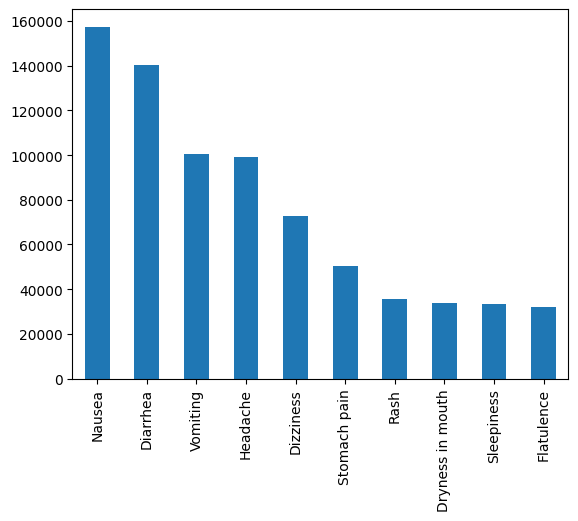

In [9]:
combined_side_effects=[f'sideEffect{i}' for i in range(0,42)]
data['no_of_side_effects']=data[combined_side_effects].notnull().sum(axis=1)
side_Effects= data[combined_side_effects].apply(lambda x: x.value_counts()).sum(axis=1).sort_values(ascending=False)
print(side_Effects.head(10))
side_Effects.dropna().head(10).plot.bar()

Treatment of Bacterial infections                             42474.0
 Pain relief                                                  23401.0
Treatment of Peptic ulcer disease                             13833.0
Treatment of Gastroesophageal reflux disease (Acid reflux)    13788.0
Treatment of Type 2 diabetes mellitus                         11454.0
 Bacterial infections                                         11290.0
Treatment of Hypertension (high blood pressure)                7917.0
Treatment of Allergic conditions                               6287.0
Treatment of Sneezing and runny nose due to allergies          5245.0
Treatment of Heartburn                                         4920.0
dtype: float64


<Axes: >

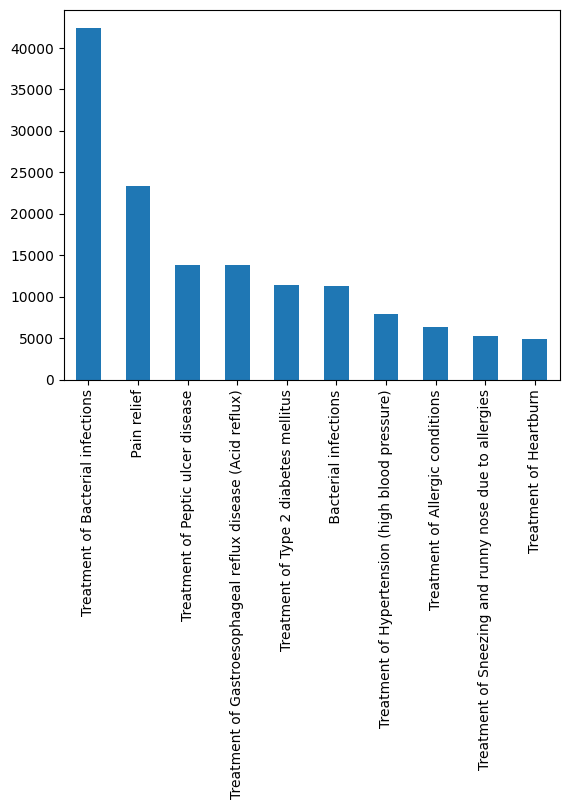

In [10]:
combined_uses=[f'use{i}' for i in range(0,5)]
uses=data[combined_uses].apply(lambda x: x.value_counts()).sum(axis=1).sort_values(ascending=False)
print(uses.head(10))
uses.dropna().head(10).plot.bar()

Chemical Class
Sulfinylbenzimidazole Derivative                             37661
Fluoroquinolone                                              33216
Broad Spectrum (Third & fourth generation cephalosporins)    24233
Gluco/mineralocorticoids, progestogins and derivatives       24160
Macrolides                                                   23611
Broad spectrum (Third & fourth generation cephalosporins}    20606
Pyrrole & heptanoic acid derivative                          17300
Intermediate spectrum {Second generation cephalosporins}     16241
Phenylacetic acid Derivative                                 15575
Glucocorticoids                                              14742
dtype: int64


<Axes: xlabel='Chemical Class'>

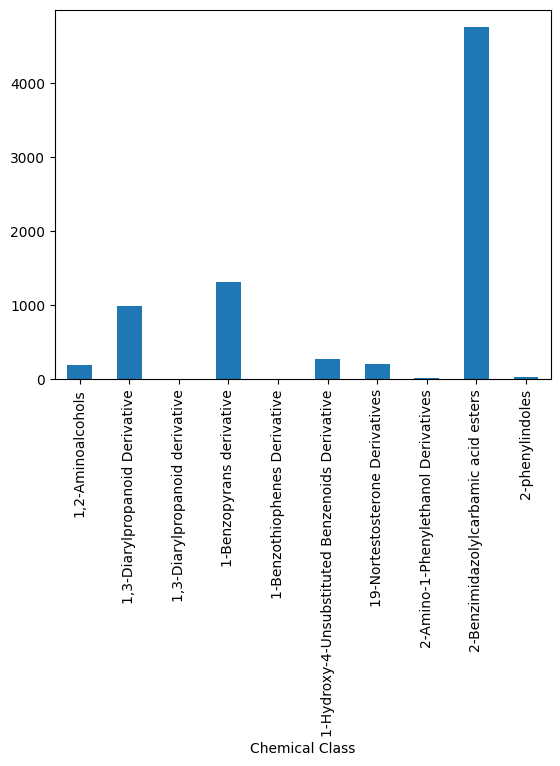

In [11]:
chemical_class_effects = data.groupby('Chemical Class')[combined_side_effects].apply(lambda x: x.notnull().sum()).sum(axis=1)
print(chemical_class_effects.sort_values(ascending=False).head(10))
chemical_class_effects.dropna().head(10).plot.bar()

Therapeutic Class
ANTI INFECTIVES      310621
GASTRO INTESTINAL    227218
NEURO CNS            210689
RESPIRATORY          193749
PAIN ANALGESICS      192115
CARDIAC              141970
ANTI DIABETIC         67632
OPHTHAL               47860
HORMONES              40296
DERMA                 39779
dtype: int64


<Axes: xlabel='Therapeutic Class'>

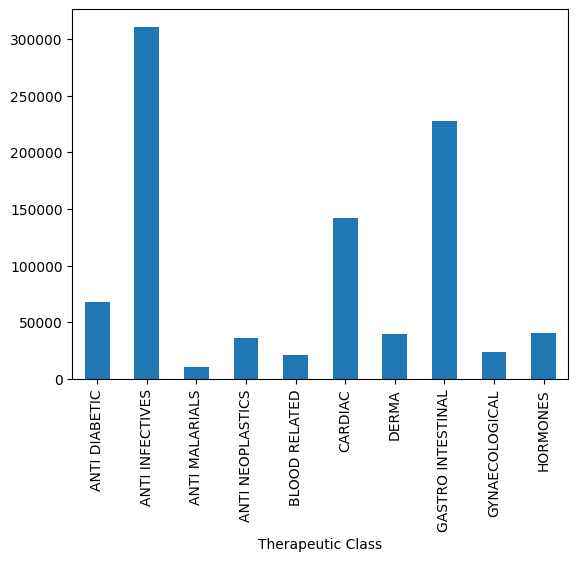

In [12]:
therapeutic_class_effects = data.groupby('Therapeutic Class')[combined_side_effects].apply(lambda x: x.notnull().sum()).sum(axis=1)
print(therapeutic_class_effects.sort_values(ascending=False).head(10))
therapeutic_class_effects.dropna().head(10).plot.bar()

Action Class
Cephalosporins: 3 generation                               47581
Proton pump inhibitors                                     46206
Glucocorticoids                                            38665
Fungal ergosterol synthesis inhibitor                      37583
Quinolones/ Fluroquinolones                                33233
Sodium channel modulators (AED)                            26069
Atypical Antipsychotics                                    25790
Macrolides                                                 25185
HMG CoA inhibitors (statins)                               25078
NSAID's- Non-Selective COX 1&2 Inhibitors (acetic acid)    23288
dtype: int64


<Axes: xlabel='Action Class'>

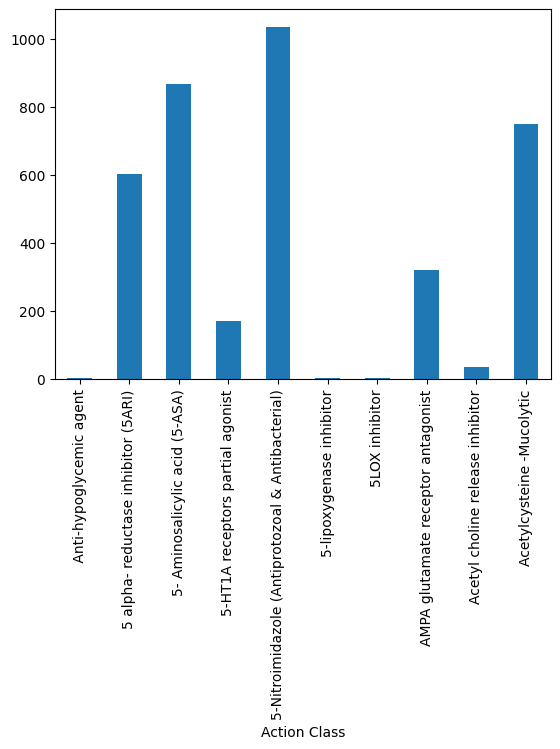

In [13]:
action_class_effects = data.groupby('Action Class')[combined_side_effects].apply(lambda x: x.notnull().sum()).sum(axis=1)
print(action_class_effects.sort_values(ascending=False).head(10))
action_class_effects.dropna().head(10).plot.bar()

In [14]:
missing_vals = data.isnull().sum() / len(data)
missing_vals

,0
id,0.000000
name,0.000000
substitute0,0.038664
substitute1,0.057816
substitute2,0.072456
substitute3,0.086061
substitute4,0.097721
sideEffect0,0.000000
sideEffect1,0.039489
sideEffect2,0.075410


In [15]:
missing_more_15 = missing_vals[missing_vals > 0.15]
missing_more_15

,0
sideEffect3,0.163485
sideEffect4,0.341063
sideEffect5,0.471199
sideEffect6,0.629934
sideEffect7,0.727054
sideEffect8,0.804583
sideEffect9,0.848085
sideEffect10,0.890121
sideEffect11,0.918092
sideEffect12,0.934404


In [16]:
df = data.drop(list(missing_more_15.index) , axis = 'columns')
df.head(5)

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,use0,Habit Forming,Therapeutic Class,no_of_substitutes,no_of_side_effects
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,Treatment of Bacterial infections,No,ANTI INFECTIVES,5,3
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Treatment of Bacterial infections,No,ANTI INFECTIVES,5,4
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,Treatment of Cough with mucus,No,RESPIRATORY,5,14
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Treatment of Sneezing and runny nose due to al...,No,RESPIRATORY,5,4
4,5,avil 25 tablet,Eralet 25mg Tablet,<NA>,<NA>,<NA>,<NA>,Sleepiness,Dryness in mouth,<NA>,Treatment of Allergic conditions,No,RESPIRATORY,1,2


In [17]:
df.dropna(inplace=True)
print(df.isnull().sum())

id                    0
name                  0
substitute0           0
substitute1           0
substitute2           0
substitute3           0
substitute4           0
sideEffect0           0
sideEffect1           0
sideEffect2           0
use0                  0
Habit Forming         0
Therapeutic Class     0
no_of_substitutes     0
no_of_side_effects    0
dtype: int64


In [18]:
top_treatments = list(df['use0'].value_counts().head(10).index)
top_treatments

['Treatment of Bacterial infections',
 ' Pain relief',
 'Treatment of Type 2 diabetes mellitus',
 'Treatment of Gastroesophageal reflux disease (Acid reflux)',
 ' Bacterial infections',
 'Treatment of Hypertension (high blood pressure)',
 'Treatment of Sneezing and runny nose due to allergies',
 'Treatment of Heartburn',
 'Treatment of Neuropathic pain',
 'Treatment of Fungal infections']

In [19]:
def filter_high_uses(x):
  return x in top_treatments

In [20]:
df_1 = df[df['use0'].apply(filter_high_uses)]
df_1.head(10)

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,use0,Habit Forming,Therapeutic Class,no_of_substitutes,no_of_side_effects
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,Treatment of Bacterial infections,No,ANTI INFECTIVES,5,3
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Treatment of Bacterial infections,No,ANTI INFECTIVES,5,4
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Treatment of Sneezing and runny nose due to al...,No,RESPIRATORY,5,4
5,6,allegra-m tablet,Emlukast-FX Tablet,LCFEX-Mont Tablet,Fixar 10mg/120mg Tablet,Histakind-M Tablet,Histafree-M Tablet,Nausea,Diarrhea,Vomiting,Treatment of Sneezing and runny nose due to al...,No,RESPIRATORY,5,8
6,7,amoxyclav 625 tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,Treatment of Bacterial infections,No,ANTI INFECTIVES,5,3
7,8,azee 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Treatment of Bacterial infections,No,ANTI INFECTIVES,5,4
10,11,aciloc 150 tablet,Zinemac 150 Tablet,Monoloc 150mg Tablet,Ranitas 150mg Tablet,Ranloc 150mg Tablet,Zynol 150mg Tablet,Headache,Diarrhea,Gastrointestinal disturbance,Treatment of Gastroesophageal reflux disease (...,No,GASTRO INTESTINAL,5,3
15,16,arkamin tablet,Albamine 100mcg Tablet,Arkapres 100 Tablet,Cloud 100mcg Tablet,Closidin 100mcg Tablet,Cata-Dict 0.1 Tablet,Dizziness,Dryness in mouth,Headache,Treatment of Hypertension (high blood pressure),No,CARDIAC,5,8
18,19,allegra 180mg tablet,Lcfex 180 Tablet,Fexofen 180mg Tablet,Mavifex 180mg Tablet,Histafree 180 Tablet,Vilofex 180 Tablet,Headache,Drowsiness,Dizziness,Treatment of Sneezing and runny nose due to al...,No,RESPIRATORY,5,4
22,23,altraday capsule sr,Krd AR 200mg/20mg Capsule SR,Rient-A Capsule SR,Rabispan-AC Capsule SR,Douxrab Ace 200mg/20mg Capsule SR,Rabewan AC 200mg/20mg Capsule SR,Nausea,Flatulence,Indigestion,Pain relief,No,PAIN ANALGESICS,5,5


In [21]:
for col in list(df_1.columns):
  print(col , len(df_1[col].unique()))

id 110093
name 97730
substitute0 2844
substitute1 3224
substitute2 3401
substitute3 3532
substitute4 3580
sideEffect0 55
sideEffect1 62
sideEffect2 65
use0 10
Habit Forming 2
Therapeutic Class 11
no_of_substitutes 1
no_of_side_effects 19


In [22]:
df_1['sideEffect0'].value_counts()

,count
sideEffect0,
Nausea,32451
Diarrhea,19589
Vomiting,10880
Rash,9850
Headache,7493
Hypoglycemia (low blood glucose level),6750
Dizziness,3990
Abdominal pain,3179
Fatigue,1628


<Axes: xlabel='sideEffect0'>

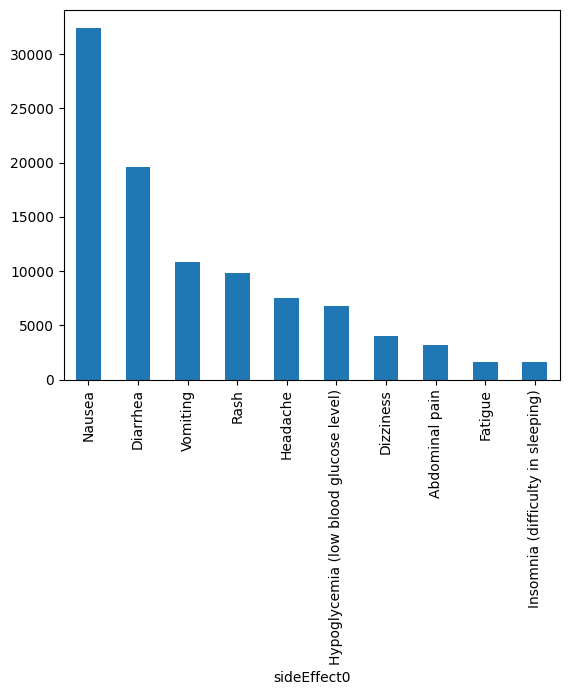

In [23]:
df_1['sideEffect0'].value_counts().head(10).plot.bar()

In [24]:
substitute0_sideeffects = {}
for sub, side_effects in df_1.groupby('substitute0')['sideEffect0']:
    substitute0_sideeffects[sub] = side_effects.value_counts().to_dict()

st0_sideeffects = pd.DataFrame(substitute0_sideeffects).fillna(0)
st0_sideeffects.head(10)

,1-AL M Syrup,3 Cef 250mg Tablet,3A 250mg Tablet DT,3D Injection,A Flox 200mg Tablet,AD 150mg/100mg Suspension,AF 300 Tablet,ANAMOL 250 MG SUPPOSITORY,Abdome 1mg Oral Suspension,Abetin-NT 200 Tablet,...,Zycin 500mg Injection,Zyde MF 80mg/500mg Tablet,Zydero 10mg/20mg Tablet,Zylocef T 250 mg/31.25 mg Injection,Zylomef P DS Oral Suspension,Zymost D Tablet,Zyn 500mg Tablet,Zynaclox 250mg/250mg Injection,Zynol 300mg Tablet,Zythro 200mg Oral Suspension
Rash,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
Vomiting,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,20.0
Limb pain,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nausea,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0
Headache,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Anal irritation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dryness in mouth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Constipation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fatigue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flatulence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
st0_sideeffects = st0_sideeffects.drop_duplicates()

In [26]:
df_1['Therapeutic Class'].value_counts()

,count
Therapeutic Class,
ANTI INFECTIVES,43096
PAIN ANALGESICS,19291
GASTRO INTESTINAL,15621
ANTI DIABETIC,10781
CARDIAC,7282
RESPIRATORY,4971
OPHTHAL,4809
NEURO CNS,3859
OPHTHAL OTOLOGICALS,230


In [27]:
df_1.groupby('Therapeutic Class')['Habit Forming'].value_counts()

,,count
Therapeutic Class,Habit Forming,
ANTI DIABETIC,No,10781
ANTI INFECTIVES,No,43096
CARDIAC,No,7282
GASTRO INTESTINAL,No,15621
NEURO CNS,No,3859
OPHTHAL,No,4809
OPHTHAL OTOLOGICALS,No,230
OTOLOGICALS,No,135
PAIN ANALGESICS,No,19018


<Axes: xlabel='Therapeutic Class'>

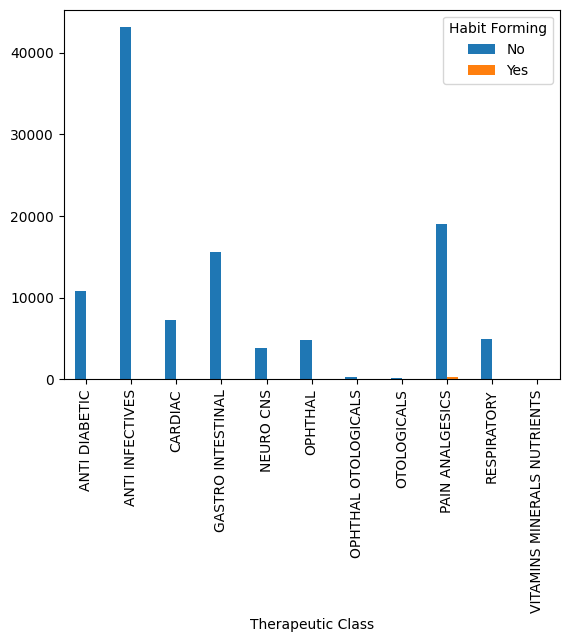

In [28]:
df_1.groupby('Therapeutic Class')['Habit Forming'].value_counts().unstack().fillna(0).plot.bar()

In [29]:
df_1.columns

Index(['id', 'name', 'substitute0', 'substitute1', 'substitute2',
       'substitute3', 'substitute4', 'sideEffect0', 'sideEffect1',
       'sideEffect2', 'use0', 'Habit Forming', 'Therapeutic Class',
       'no_of_substitutes', 'no_of_side_effects'],
      dtype='object')

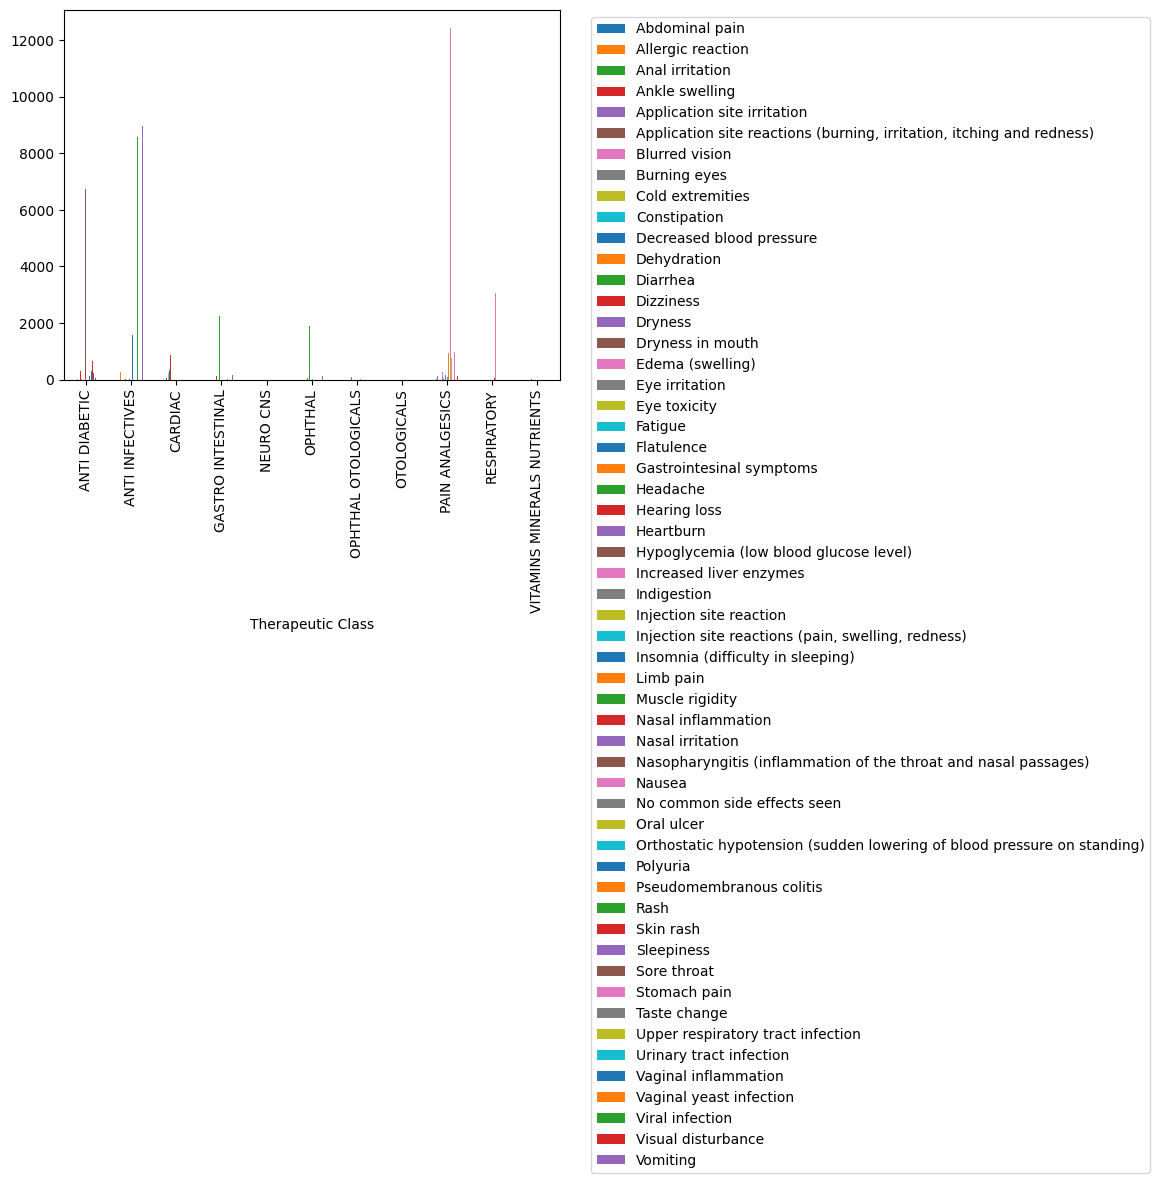

In [30]:
df_1.groupby('Therapeutic Class')['sideEffect0'].value_counts().unstack().fillna(0).plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

<Axes: xlabel='sideEffect'>

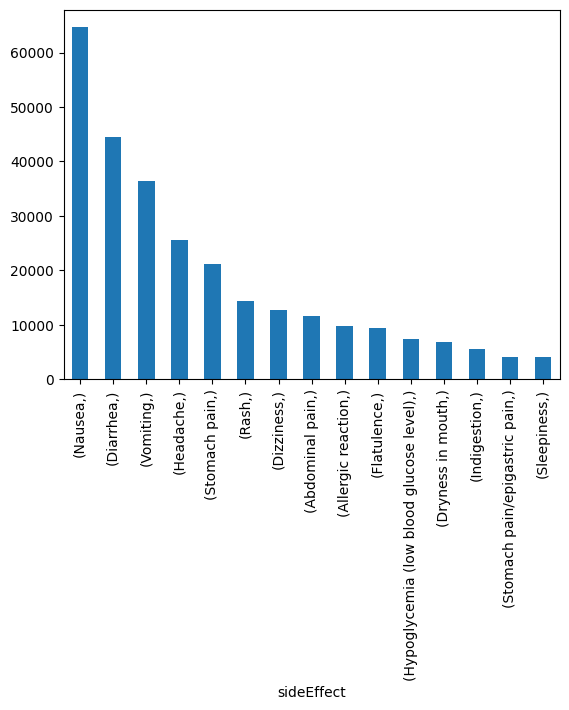

In [31]:
all_side_effects=[]
for subs in df_1['sideEffect0']:
  all_side_effects.append(subs)
for subs in df_1['sideEffect1']:
  all_side_effects.append(subs)
for subs in df_1['sideEffect2']:
  all_side_effects.append(subs)

all_side_effects_df = pd.DataFrame(all_side_effects, columns=['sideEffect'])
all_side_effects_df.value_counts().head(15).plot.bar()


In [32]:
df_1.columns

Index(['id', 'name', 'substitute0', 'substitute1', 'substitute2',
       'substitute3', 'substitute4', 'sideEffect0', 'sideEffect1',
       'sideEffect2', 'use0', 'Habit Forming', 'Therapeutic Class',
       'no_of_substitutes', 'no_of_side_effects'],
      dtype='object')

In [40]:
attributes=['Therapeutic Class', 'substitute0']
x=df_1[attributes]
y=df_1['use0']
for col in attributes:
    x[col] = x[col].astype(str)
y=y.astype(str)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

<ipython-input-40-3a57d0a17385>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = x[col].astype(str)
<ipython-input-40-3a57d0a17385>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = x[col].astype(str)


In [41]:
encoder=OrdinalEncoder()
x_train=encoder.fit_transform(x_train)
x_test=encoder.fit_transform(x_test)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [42]:
model = CategoricalNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
y_pred

array([2., 1., 9., ..., 0., 1., 2.])

In [44]:
y_test=y_test.reshape(-1)
y_test

array([2., 1., 9., ..., 2., 1., 2.])

In [45]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

Accuracy: 0.80
Confusion Matrix:
[[  427     1  2666    90   132     0     0     0     0     0]
 [    0  7756    21    26    91     0     0     0     3     0]
 [ 1887     2 11794  1118   400     0     0     0     0     0]
 [    6     0   352  1074     0     0     0     0     0     0]
 [    5   368   198     0  3186    19     0     0     0     0]
 [    0     0     1     0  1609    14     0     0     0     0]
 [    0     0     0     0     0     0  2958     0     0     0]
 [    0     3     0     0     0     0     0  1544     0     0]
 [    0     0     0     0     0     0     0     0  1999     0]
 [    0     0     0     0     0     0     0     0     0  4288]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.18      0.13      0.15      3316
         1.0       0.95      0.98      0.97      7897
         2.0       0.78      0.78      0.78     15201
         3.0       0.47      0.75      0.57      1432
         4.0       0.59      0.84      0.6